In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [2]:
'''
country:  Name of the country
child_mort:  Death of children under 5 years of age per 1000 live births
exports:  Exports of goods and services per capita. Given as %age of the GDP per capita
health:  Total health spending per capita. Given as %age of GDP per capita
imports:  Imports of goods and services per capita. Given as %age of the GDP per capita
Income:  Net income per person
Inflation:  The measurement of the annual growth rate of the Total GDP
life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.
gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.
'''
None

In [3]:
df=pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<AxesSubplot:>

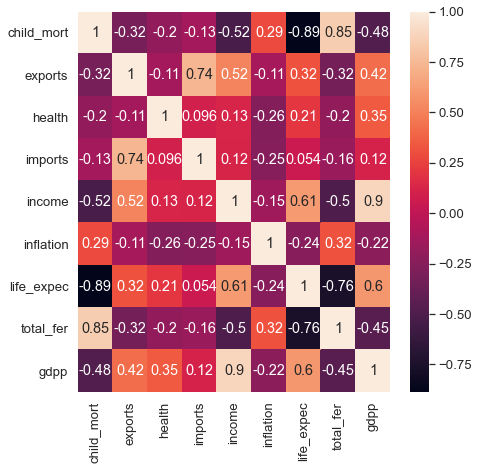

In [5]:
sns.heatmap(df.corr(),annot=True)

In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
x=df.drop('country',axis=1)
x.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [9]:
x

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# KMeans

C:\Anaconda\envs\aipnd\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Score')

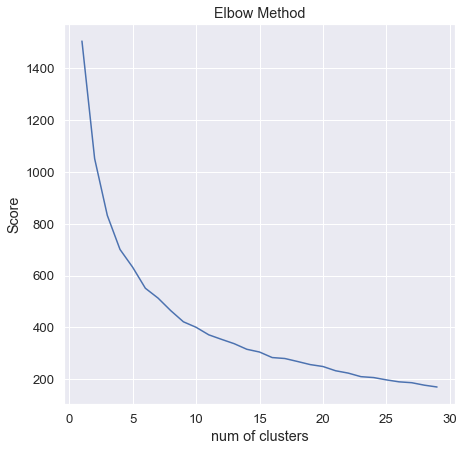

In [10]:
scores = []
for i in range(1, 30):
    model = KMeans(n_clusters=i)
    model.fit(x)
    scores.append(model.inertia_)
plt.plot(range(1, 30), scores)
plt.title("Elbow Method")
plt.xlabel("num of clusters")
plt.ylabel("Score")

In [11]:
model = KMeans(n_clusters=23)
clusters = model.fit_predict(x)
clusters

array([ 8, 20,  6, 22, 20,  6, 20,  3, 16,  6, 20, 21, 17, 20, 20, 16, 11,
        0, 11, 17, 15, 11,  6,  7, 20, 14,  8, 11,  0,  3, 20, 14, 14,  6,
        6,  6,  0, 14, 22, 15, 14, 20,  1,  1, 16,  6,  6, 17, 20, 22,  0,
        1, 11,  3,  3, 18,  0, 15,  3, 18,  3, 20,  2, 14,  8, 11, 10,  1,
       16, 17, 17,  6, 18, 16,  3,  3, 20,  3,  2, 21,  0, 13,  7, 11, 17,
       20, 20, 13, 13, 21,  1,  5, 20,  0, 14,  1,  1, 14,  9, 22, 20, 13,
       15, 12, 15, 20, 14, 17, 11, 17, 16,  3, 14,  4, 16, 21, 17,  1, 20,
        6, 17, 20,  3, 19, 20,  6,  8,  2, 21,  0, 15,  1,  8,  9,  1,  1,
       11, 17,  1,  3,  6, 20, 18, 20, 16, 16,  2,  0,  1, 18,  8,  2, 20,
        6, 11,  8, 20,  7,  3,  3,  6, 17, 11, 12,  1, 18, 14])

In [12]:
pd.Series(clusters).value_counts()

20    24
6     15
1     14
3     14
17    12
11    11
14    11
16     9
0      9
8      7
15     6
18     6
2      5
21     5
13     4
22     4
7      3
9      2
12     2
10     1
5      1
4      1
19     1
dtype: int64

In [13]:
df['cluster']=clusters
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,8
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,20
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,6
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,22
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,20
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,11
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,12
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,18


In [14]:
df[(df['cluster']==0)|(df['cluster']==1)].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,0
28,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,0
36,Comoros,88.2,16.5,4.51,51.7,1410,3.870,65.9,4.75,769,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,1
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,1


Comparing the KMeans clustring results, i see we got good accuracy 

In [15]:
import joblib
joblib.dump(model, 'kmeans_model.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

# Hierarchical Clustering

In [16]:
import scipy.cluster.hierarchy as sch

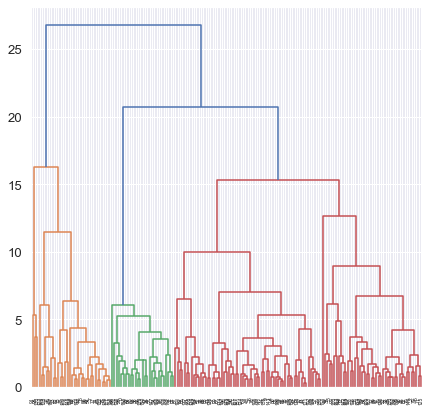

In [17]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

In [18]:
model = AgglomerativeClustering(n_clusters=7)
clusters = model.fit_predict(x)
clusters

array([6, 0, 1, 1, 0, 1, 0, 4, 4, 0, 0, 2, 1, 0, 0, 4, 0, 6, 0, 1, 0, 0,
       1, 2, 0, 6, 6, 0, 6, 4, 0, 6, 6, 1, 1, 1, 6, 6, 1, 0, 6, 0, 0, 0,
       4, 1, 1, 1, 0, 1, 1, 0, 0, 4, 4, 1, 6, 0, 4, 1, 4, 0, 1, 6, 6, 0,
       6, 0, 4, 1, 1, 1, 1, 4, 4, 4, 0, 4, 0, 1, 6, 0, 2, 0, 1, 0, 0, 0,
       0, 2, 0, 3, 0, 6, 6, 0, 0, 6, 3, 1, 0, 0, 0, 1, 0, 0, 6, 1, 0, 1,
       4, 4, 6, 5, 4, 2, 1, 0, 0, 1, 1, 0, 4, 2, 0, 1, 6, 0, 2, 6, 0, 0,
       6, 3, 0, 0, 0, 0, 0, 4, 1, 0, 1, 0, 4, 4, 1, 6, 0, 1, 6, 0, 0, 1,
       1, 6, 0, 2, 4, 4, 1, 1, 0, 1, 0, 1, 6], dtype=int64)

In [19]:
df['cluster']=clusters

In [20]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,6
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [21]:
df[(df['cluster']==4)|(df['cluster']==1)].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,4
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,4


by comparing between some clusters, we got good accuracy

In [22]:
joblib.dump(model, 'Hierarchical_model.h5')

['Hierarchical_model.h5']